In [1]:
#start spark session
import findspark
findspark.init()
from pyspark import SparkContext
sc=SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
spark

## Try Data 1975

In [3]:
data1975 = spark.read\
  .format('csv')\
  .option('header', 'false')\
  .option('inferSchema', 'true')\
  .load("s3://open-data-noaa/1975samples")

In [4]:
data1975.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)



In [5]:
data1975.show(5)

+-----------+-------------------+------+----------+----------+---------+-----------------+-----------+---------+---------------+--------------+-----------+------------+-------+-------+-------+-----------+-----------+--------+----+----+
|        _c0|                _c1|   _c2|       _c3|       _c4|      _c5|              _c6|        _c7|      _c8|            _c9|          _c10|       _c11|        _c12|   _c13|   _c14|   _c15|       _c16|       _c17|    _c18|_c19|_c20|
+-----------+-------------------+------+----------+----------+---------+-----------------+-----------+---------+---------------+--------------+-----------+------------+-------+-------+-------+-----------+-----------+--------+----+----+
|    STATION|               DATE|SOURCE|  LATITUDE| LONGITUDE|ELEVATION|             NAME|REPORT_TYPE|CALL_SIGN|QUALITY_CONTROL|           WND|        CIG|         VIS|    TMP|    DEW|    SLP|        GF1|        MW1|     SA1| REM| EQD|
|87418099999|1975-02-04T05:00:00|     4|-32.831717|-68.7

In [6]:
data1975.count()

544785

In [8]:
#delete index row
data1975.where('_c0=="STATION"').count()

232

In [9]:
data19752=data1975.where('_c0!="STATION"')

In [10]:
data19752.count()

544553

In [11]:
#add index row
from pyspark.sql import SparkSession
#from pyspark.sql import functions._
#import pyspark.spark.sql.{SQLContext, Row, DataFrame, Column}
from pyspark.sql import Row,DataFrame,Column
from pyspark.sql import SQLContext
#from pyspark.ml import feature.VectorAssembler

In [13]:
import pyspark.sql.functions as f
from pyspark.sql.functions import concat, col, lit

data2_converted = data19752.select(col("_c0"), col("_c13"))
#data2_converted.show()
data2_converted2 = data2_converted.select(col("_c0").alias("station"), f.split(data2_converted['_c13'], ',')[0].alias("temp"))
data2_converted2.show()

+-----------+-----+
|    station| temp|
+-----------+-----+
|87418099999|+0200|
|87418099999|+0190|
|87418099999|+0190|
|87418099999|+0180|
|87418099999|+0180|
|87418099999|+0170|
|87418099999|+0190|
|87418099999|+0200|
|87418099999|+0210|
|87418099999|+0240|
|87418099999|+0250|
|87418099999|+0260|
|87418099999|+0280|
|87418099999|+0280|
|87418099999|+0280|
|87418099999|+0270|
|87418099999|+0260|
|87418099999|+0250|
|87418099999|+0240|
|87418099999|+0230|
+-----------+-----+
only showing top 20 rows



In [41]:
#Convert Data Type

In [14]:
data2_converted3=data2_converted2.withColumn("temp", data2_converted2["temp"].cast("float"))

In [15]:
data2_converted3.sort('temp', ascending=True).show()

+-----------+------+
|    station|  temp|
+-----------+------+
|74043599999|-532.0|
|74043599999|-505.0|
|24343099999|-490.0|
|24343099999|-490.0|
|24343099999|-490.0|
|24966099999|-490.0|
|24966099999|-490.0|
|24966099999|-490.0|
|42740099999|-490.0|
|24966099999|-490.0|
|24966099999|-490.0|
|74043599999|-490.0|
|74043599999|-482.0|
|74043599999|-482.0|
|24966099999|-480.0|
|24343099999|-480.0|
|24343099999|-480.0|
|24966099999|-480.0|
|24966099999|-480.0|
|24966099999|-480.0|
+-----------+------+
only showing top 20 rows



In [16]:
# Rescale since the original data is scaled by 10
data2_converted4=data2_converted3.withColumn("temp", data2_converted3["temp"]/10)
data2_converted4.show()

+-----------+----+
|    station|temp|
+-----------+----+
|87418099999|20.0|
|87418099999|19.0|
|87418099999|19.0|
|87418099999|18.0|
|87418099999|18.0|
|87418099999|17.0|
|87418099999|19.0|
|87418099999|20.0|
|87418099999|21.0|
|87418099999|24.0|
|87418099999|25.0|
|87418099999|26.0|
|87418099999|28.0|
|87418099999|28.0|
|87418099999|28.0|
|87418099999|27.0|
|87418099999|26.0|
|87418099999|25.0|
|87418099999|24.0|
|87418099999|23.0|
+-----------+----+
only showing top 20 rows



In [17]:
# Drop rows with NA or missing values in pyspark
data2_converted4_dropna=data2_converted4.dropna()

In [18]:
data2_converted4_dropna.sort('temp', ascending=False).show()

+-----------+-----+
|    station| temp|
+-----------+-----+
|93337099999|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|72278023183|999.9|
|93337099999|999.9|
|93337099999|999.9|
|93337099999|999.9|
|93337099999|999.9|
|93337099999|999.9|
|93337099999|999.9|
|93337099999|999.9|
+-----------+-----+
only showing top 20 rows



In [19]:
#drop 9999 as NA
data2_converted4_dropna = data2_converted4_dropna.filter(data2_converted4_dropna.temp != '999.9')
data2_converted4_dropna.sort('temp', ascending=False).show()

+-----------+----+
|    station|temp|
+-----------+----+
|41572099999|49.0|
|41858099999|49.0|
|41572099999|47.0|
|40621099999|47.0|
|41572099999|47.0|
|61811099999|47.0|
|61834099999|47.0|
|41572099999|47.0|
|72278023183|46.1|
|96421099999|46.0|
|40621099999|46.0|
|72278023183|45.6|
|40621099999|45.0|
|40621099999|45.0|
|41572099999|45.0|
|35449099999|45.0|
|61226099999|45.0|
|40621099999|45.0|
|40621099999|45.0|
|61226099999|45.0|
+-----------+----+
only showing top 20 rows



In [20]:
data2_converted4_dropna.count()

508115

In [21]:
#按station average
#https://sparkbyexamples.com/spark/using-groupby-on-dataframe/
data2_converted4.groupBy("station").mean("temp").show()

+-----------+------------------+
|    station|         avg(temp)|
+-----------+------------------+
|16022099999| 652.7862527716044|
|88968099999|24.473088455772135|
|42539099999| 51.21972222222222|
|59259099999|              15.3|
|50963099999| 19.43995695839312|
|47421099999| 9.013459915611815|
|80415099999| 36.82712390629407|
|08452099999| 26.51225144323284|
|09359099999|13.864536157779401|
|47440099999| 6.803738317757009|
|04165099999|-6.638638297872341|
|47402099999| 5.734276729559748|
|57298099999|         60.658125|
|27799099999| 57.84419889502762|
|70385599999| 99.72853025936604|
|70133026616|35.800354903584385|
|24966099999| 4.111044034090907|
|36859099999| 46.71997110870352|
|47671099999| 64.17282816901445|
|53067099999| 69.36666666666666|
+-----------+------------------+
only showing top 20 rows



In [22]:
final1975 = data2_converted4_dropna.groupBy("station").mean("temp")
final1975 = final1975.select(col("station"),col("avg(temp)").alias("avgtemp"))
final1975.show()

+-----------+-------------------+
|    station|            avgtemp|
+-----------+-------------------+
|59259099999|               15.3|
|42539099999| 26.894586894586894|
|16022099999| 2.7770700636942673|
|88968099999| -4.902702702702703|
|50963099999| 3.7182944606413995|
|47421099999|  8.595187842971718|
|80415099999| 25.830002854695977|
|47440099999|  6.803738317757009|
|09359099999|  10.61267863686332|
|08452099999|  17.69190938511327|
|04165099999|-18.776055124892334|
|47402099999|  5.734276729559748|
|57298099999| 17.686274509803923|
|27799099999|  10.46808510638298|
|24966099999|-7.6967301473230325|
|70133026616|-7.3344951180323825|
|70385599999|  6.179427359490983|
|36859099999|  9.522701688555347|
|47671099999| 15.186814489832217|
|53067099999|                2.9|
+-----------+-------------------+
only showing top 20 rows



In [23]:
final1975.limit(10).show()

+-----------+-------------------+
|    station|            avgtemp|
+-----------+-------------------+
|59259099999|               15.3|
|42539099999| 26.894586894586894|
|16022099999| 2.7770700636942673|
|88968099999| -4.902702702702703|
|80415099999| 25.830002854695977|
|47402099999|  5.734276729559748|
|24966099999|-7.6967301473230325|
|70385599999|  6.179427359490983|
|70133026616|-7.3344951180323825|
|72311013873| 16.623801711004326|
+-----------+-------------------+



In [24]:
final1975.createOrReplaceTempView("final1975")

In [25]:
final1975 = spark.sql("SELECT station,avgtemp FROM final1975 ORDER BY avgtemp ASC")

In [26]:
sample1975 = final1975.limit(10)

In [27]:
sample1975.show()

+-----------+-------------------+
|    station|            avgtemp|
+-----------+-------------------+
|04165099999|-18.776055124892334|
|04175099999|           -16.8125|
|36421099999|-14.283132530120483|
|74090099999|-12.263427109974424|
|72914099999| -9.059259259259258|
|24343099999| -8.935617469879517|
|24966099999|-7.6967301473230325|
|70133026616|-7.3344951180323825|
|23021099999| -6.228237015362107|
|88968099999| -4.902702702702703|
+-----------+-------------------+



In [39]:
#pip install pyarrow

     |████████████████████████████████| 63.8 MB 16.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
final1975_p = final1975.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead
  warnings.warn(msg, FutureWarning)


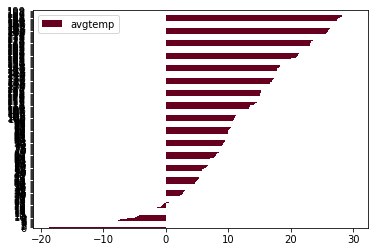

In [29]:
final1975_p.plot(kind='barh',y='avgtemp',colormap='RdBu')

### Calculate and store AvgTemp for 1975

In [30]:
final1975.agg(f.mean('avgtemp'), f.count('avgtemp')).show()

+------------------+--------------+
|      avg(avgtemp)|count(avgtemp)|
+------------------+--------------+
|11.842673078307735|           200|
+------------------+--------------+



In [31]:
data2_converted4_dropna.agg({"temp": "avg"}).show()

+------------------+
|         avg(temp)|
+------------------+
|10.203057575548842|
+------------------+

